In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df_nn=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/nifty_sensex_close_data/data/trading_signal_nn_mm.csv')
df_tema=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/nifty_sensex_close_data/data/trading_signal_tema_mm.csv')

In [8]:
n=len(df_tema)
w=25
b=int(0.8*(n-w))
y=b+w

df_tema_u=df_tema.iloc[y:,:]
df_tema_close=df_tema['Close']
df_tema_u.shape

(636, 3)

In [9]:
nn_num=df_nn.to_numpy()
nn_num=nn_num[:,-1]
nn_num=nn_num.reshape(-1,1)
nn_num.shape

(636, 1)

In [12]:
tema_num=df_tema_u.to_numpy()
tema_num=tema_num[:,-1]
tema_num=tema_num.reshape(-1,1)
tema_num.shape

(636, 1)

In [14]:
#final trade signals
final=np.array([])

for i in range(len(tema_num)):
    if tema_num[i]==1 and nn_num[i]==1:
        final=np.append(final,1)
    elif tema_num[i]==-1 and nn_num[i]==-1:
        final=np.append(final,-1)
    else:
        final=np.append(final,0)

final=final.reshape(-1,1)
final.shape

(636, 1)

In [18]:
#profit calculation

profit=0
loss=0
for i in range(len(final)):
    if final[i]==1:
        profit+=df_tema_close[y+i]-df_tema_close[y+i-1]
    elif final[i]==-1:
        loss+=df_tema_close[y+i-1]-df_tema_close[y+i]

net_profit=profit-loss
profit_factor=profit/loss
print('Net Profit:',net_profit)
print('Profit Factor:',profit_factor)

print('Profit:',profit)
print('Loss:',loss)


Net Profit: 451.15594482421864
Profit Factor: -2.5441106806543785
Profit: 323.85858154296864
Loss: -127.29736328125


In [16]:
#no of trades
trades=0
for i in range(len(final)):
    if final[i]!=0:
        trades+=1

print('no of trades:',trades)

no of trades: 396


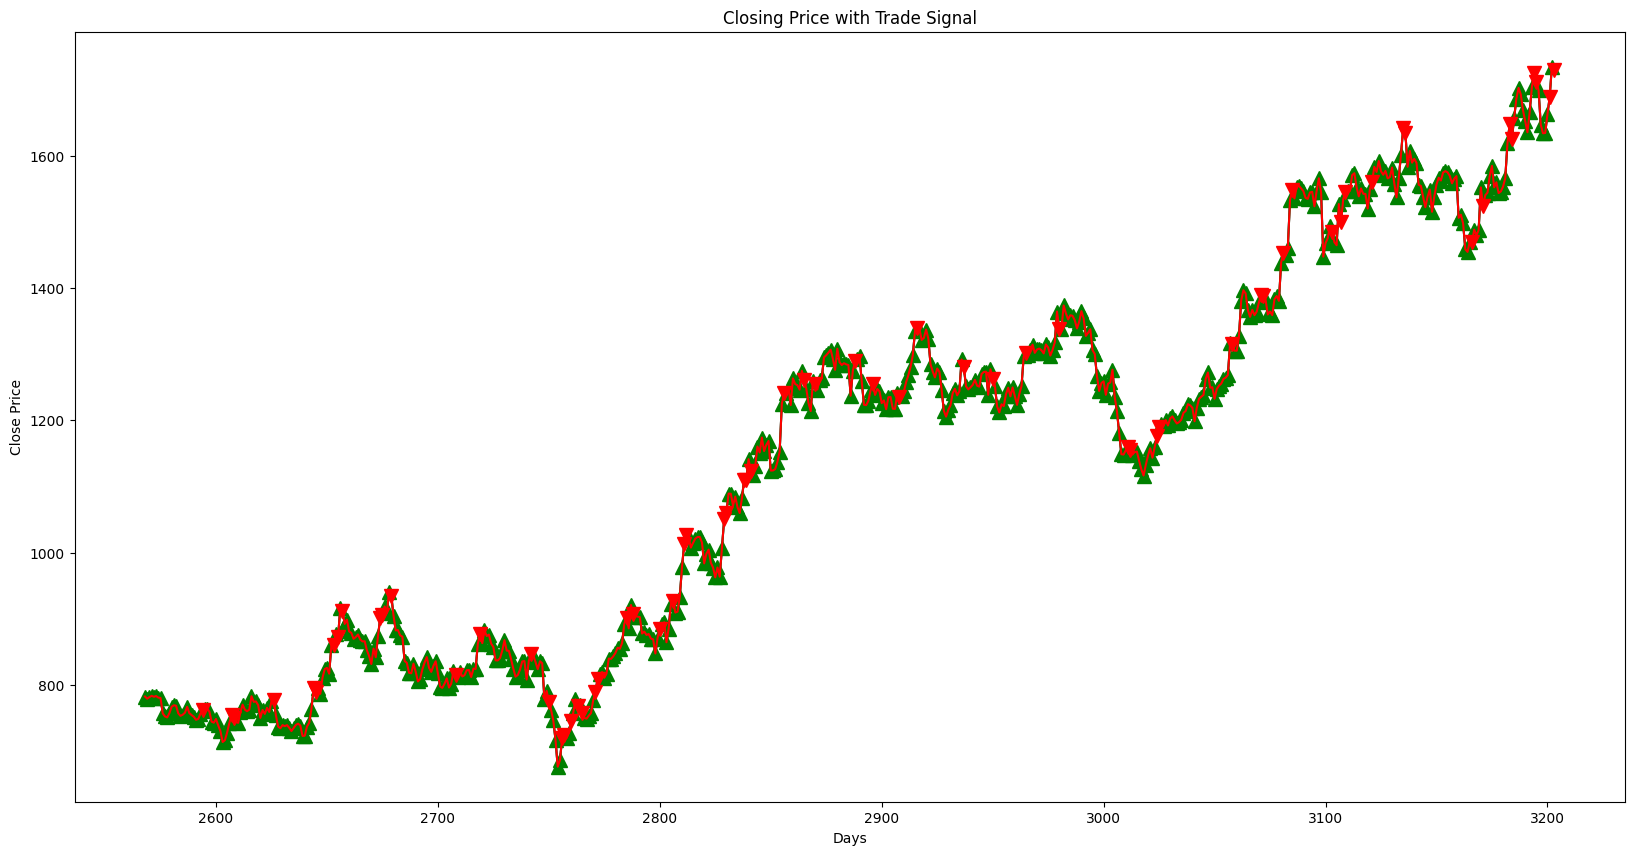

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df_tema_u['Close'])
plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df_tema_u.index,df_tema_u['Close'],'-^', markevery=[i for i in range(len(nn_num)) if nn_num[i]==1], ms=10, color='g')
plt.plot(df_tema_u.index,df_tema_u['Close'],'-v', markevery=[i for i in range(len(nn_num)) if nn_num[i]==-1], ms=10, color='r')
plt.show()

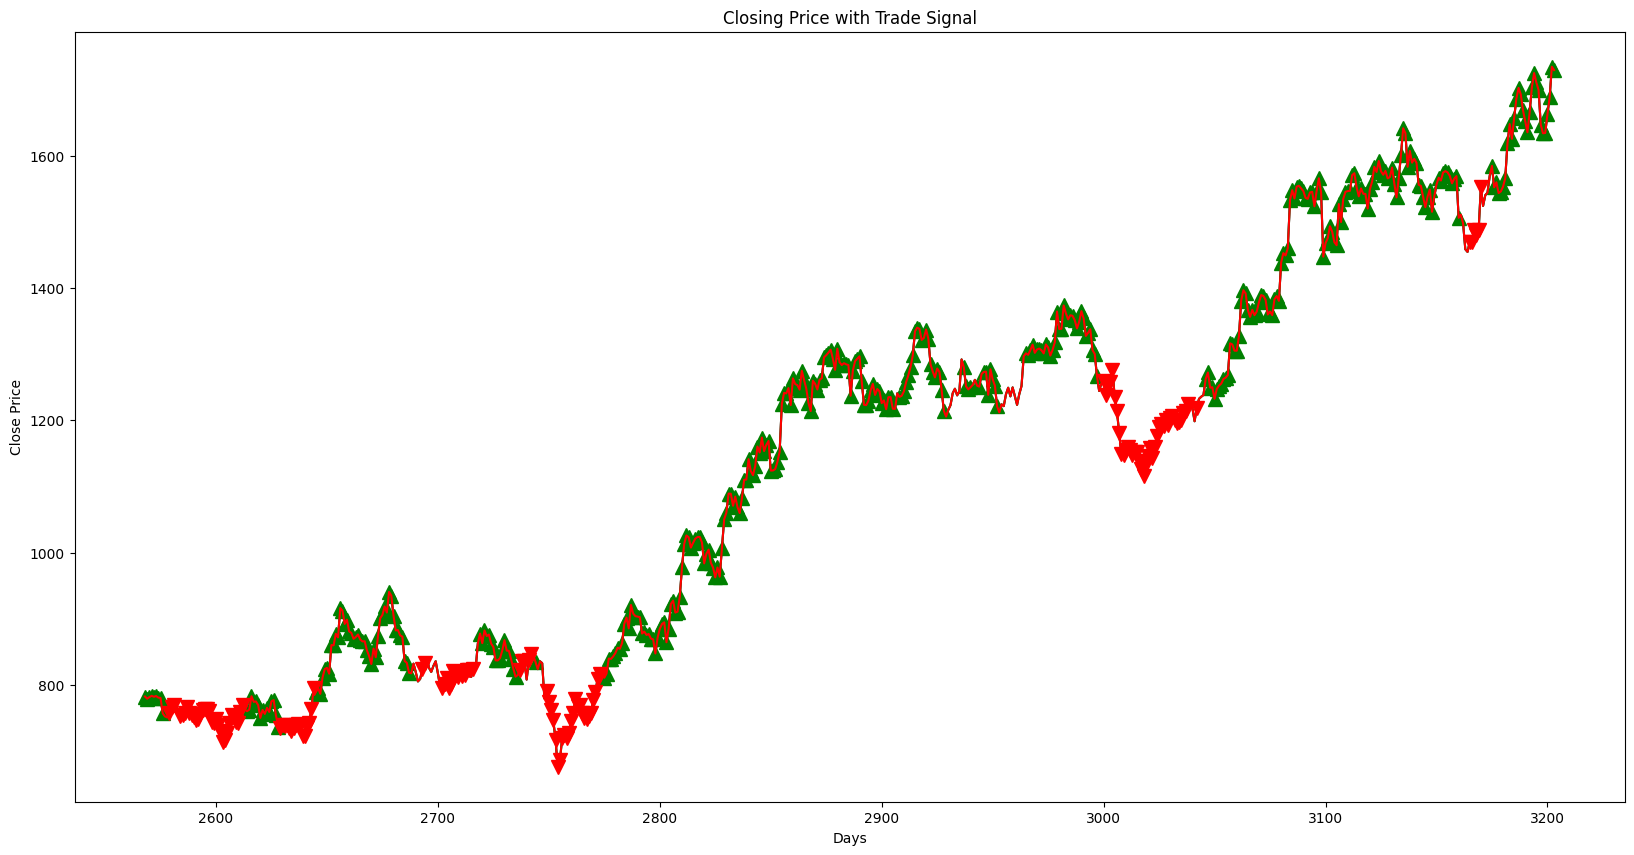

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df_tema_u['Close'])
plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df_tema_u.index,df_tema_u['Close'],'-^', markevery=[i for i in range(len(tema_num)) if tema_num[i]==1], ms=10, color='g')
plt.plot(df_tema_u.index,df_tema_u['Close'],'-v', markevery=[i for i in range(len(tema_num)) if tema_num[i]==-1], ms=10, color='r')
plt.show()

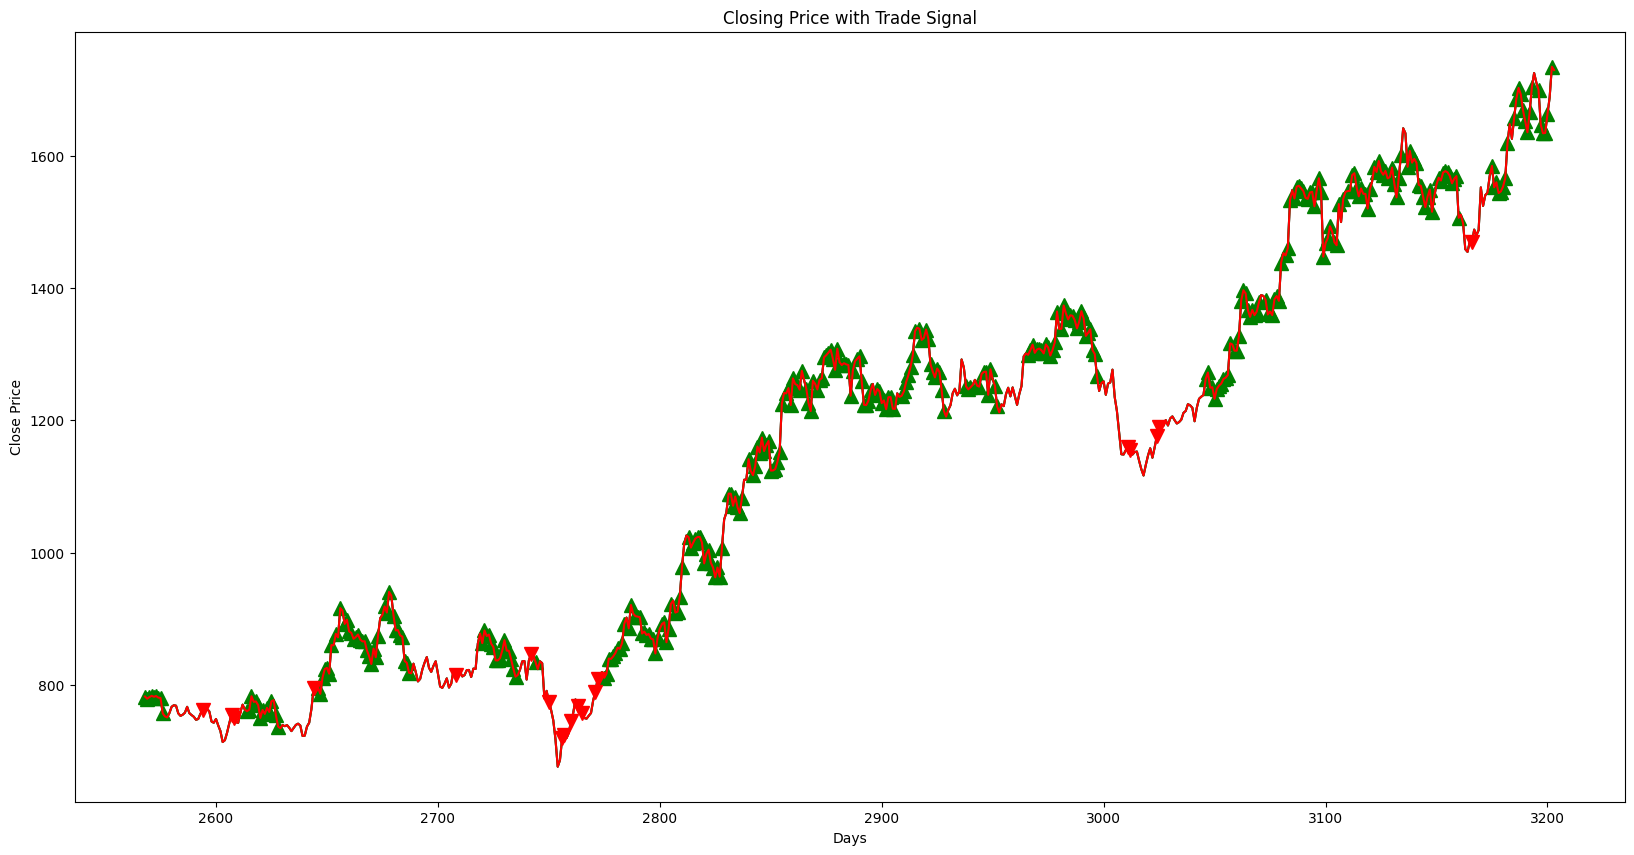

In [21]:
#plotting closing price and marking trade signal in final plot

plt.figure(figsize=(20,10))
plt.plot(df_tema_u['Close'])
plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df_tema_u.index,df_tema_u['Close'],'-^', markevery=[i for i in range(len(final)) if final[i]==1], ms=10, color='g')
plt.plot(df_tema_u.index,df_tema_u['Close'],'-v', markevery=[i for i in range(len(final)) if final[i]==-1], ms=10, color='r')
plt.show()
